In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
from scipy import stats
import missingno as msno

In [3]:
df = pd.read_csv("datasets/ispu_dki_all.csv")

In [4]:
df.head()

,tanggal,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,categori
0,2010-01-01,DKI1 (Bunderan HI),60.0,NaN,4.0,73.0,27.0,14.0,73.0,CO,SEDANG
1,2010-01-02,DKI1 (Bunderan HI),32.0,NaN,2.0,16.0,33.0,9.0,33.0,O3,BAIK
2,2010-01-03,DKI1 (Bunderan HI),27.0,NaN,2.0,19.0,20.0,9.0,27.0,PM10,BAIK
3,2010-01-04,DKI1 (Bunderan HI),22.0,NaN,2.0,16.0,15.0,6.0,22.0,PM10,BAIK
4,2010-01-05,DKI1 (Bunderan HI),25.0,NaN,2.0,17.0,15.0,8.0,25.0,PM10,BAIK


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4626 entries, 0 to 4625
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tanggal   4626 non-null   object 
 1   stasiun   4626 non-null   object 
 2   pm10      4466 non-null   float64
 3   pm25      723 non-null    float64
 4   so2       4607 non-null   float64
 5   co        4618 non-null   float64
 6   o3        4621 non-null   float64
 7   no2       4618 non-null   float64
 8   max       4626 non-null   float64
 9   critical  4625 non-null   object 
 10  categori  4626 non-null   object 
dtypes: float64(7), object(4)
memory usage: 397.7+ KB


In [6]:
df.describe()

,pm10,pm25,so2,co,o3,no2,max
count,4466.000000,723.000000,4607.000000,4618.000000,4621.000000,4618.000000,4626.000000
mean,65.086879,94.374827,28.183851,30.263534,86.586670,18.120832,99.432123
std,19.243150,27.427553,13.822107,13.640344,50.295879,8.451605,43.284775
min,0.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,54.000000,76.000000,18.000000,21.000000,51.000000,13.000000,70.000000
50%,64.000000,94.000000,27.000000,29.000000,78.000000,17.000000,91.000000
75%,75.000000,111.000000,34.000000,37.000000,110.000000,21.000000,118.000000
max,179.000000,287.000000,126.000000,134.000000,314.000000,134.000000,314.000000


EDA

In [7]:
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

In [8]:
pollutants = ['pm10', 'pm25', 'so2', 'co', 'o3', 'no2']

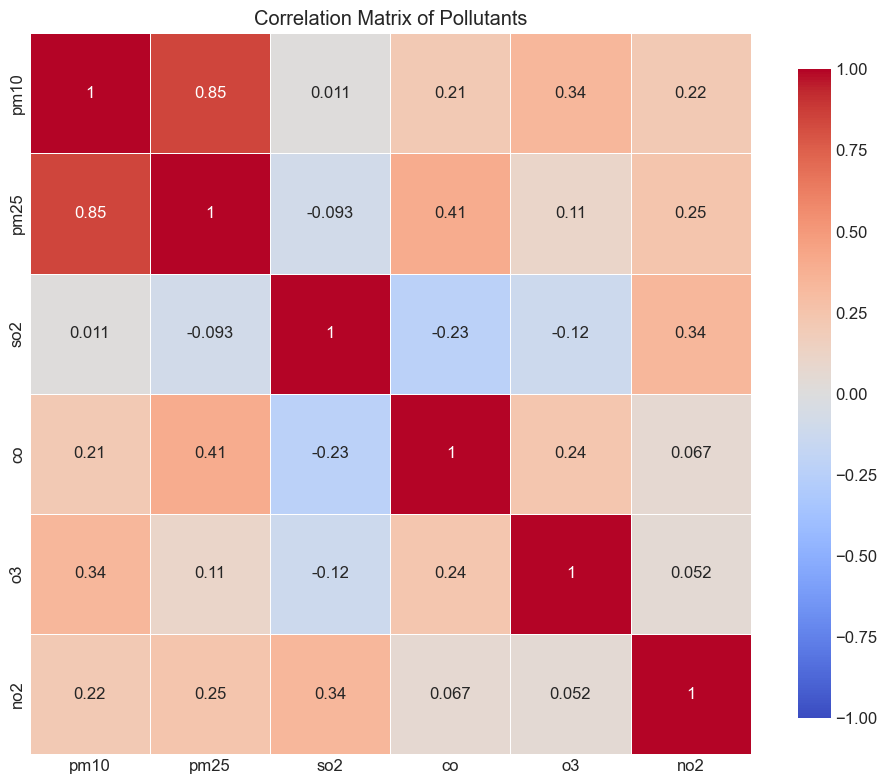

In [9]:
corr_matrix = df[pollutants].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, square=True, linewidths=0.5, cbar_kws={"shrink": .9})
plt.title('Correlation Matrix of Pollutants')
plt.tight_layout()
plt.show()

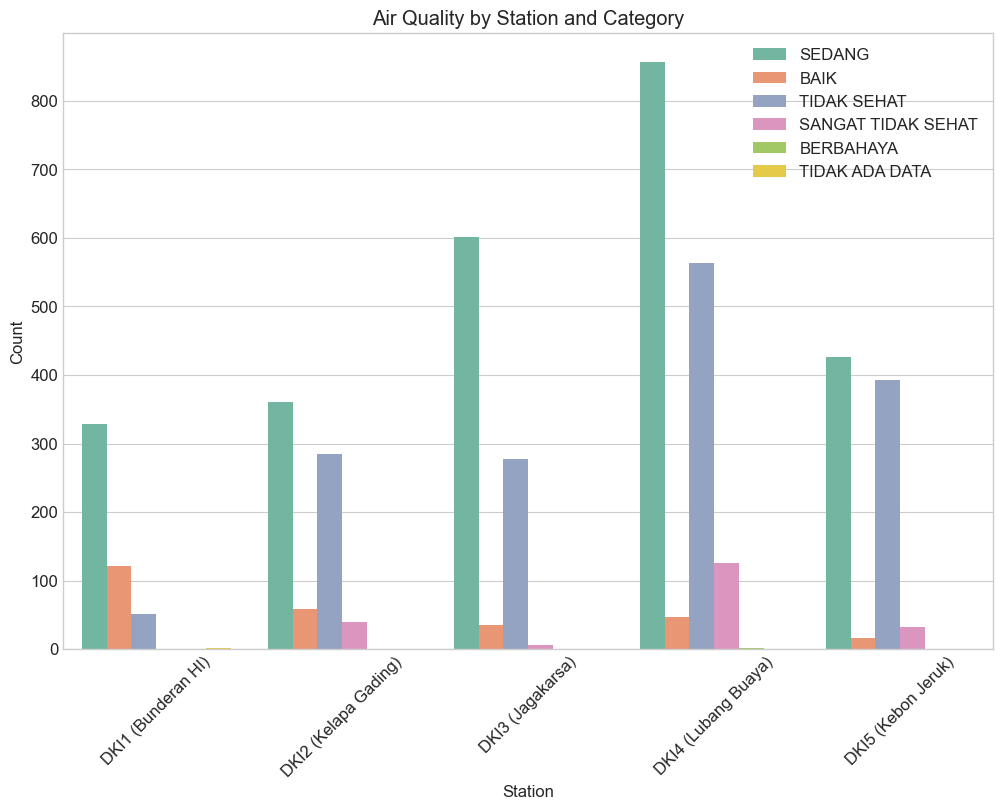

In [10]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='stasiun', hue='categori', palette='Set2')
plt.title("Air Quality by Station and Category")
plt.xlabel("Station")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()

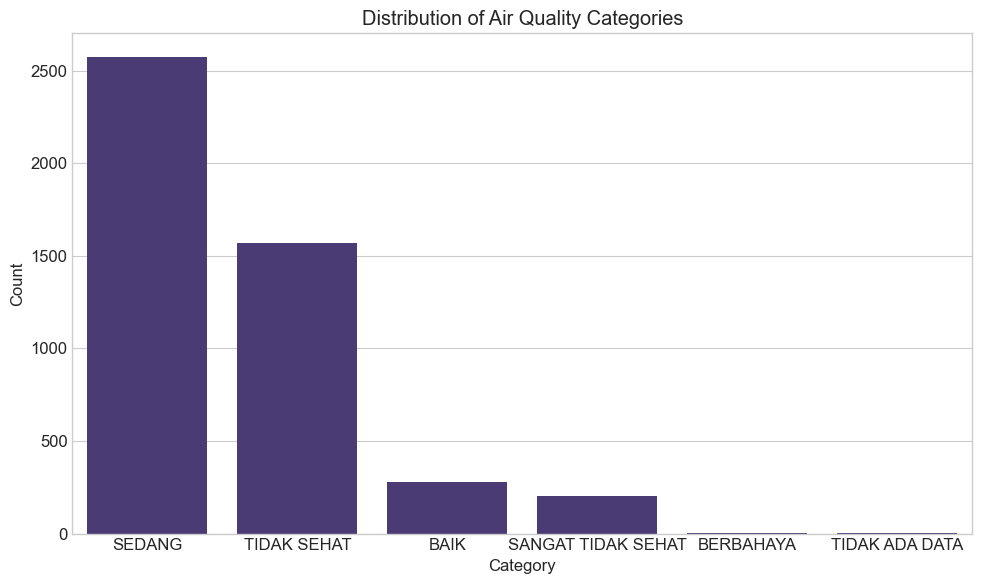

In [11]:
plt.figure(figsize=(10, 6))
category_counts = df['categori'].value_counts()
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.title('Distribution of Air Quality Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

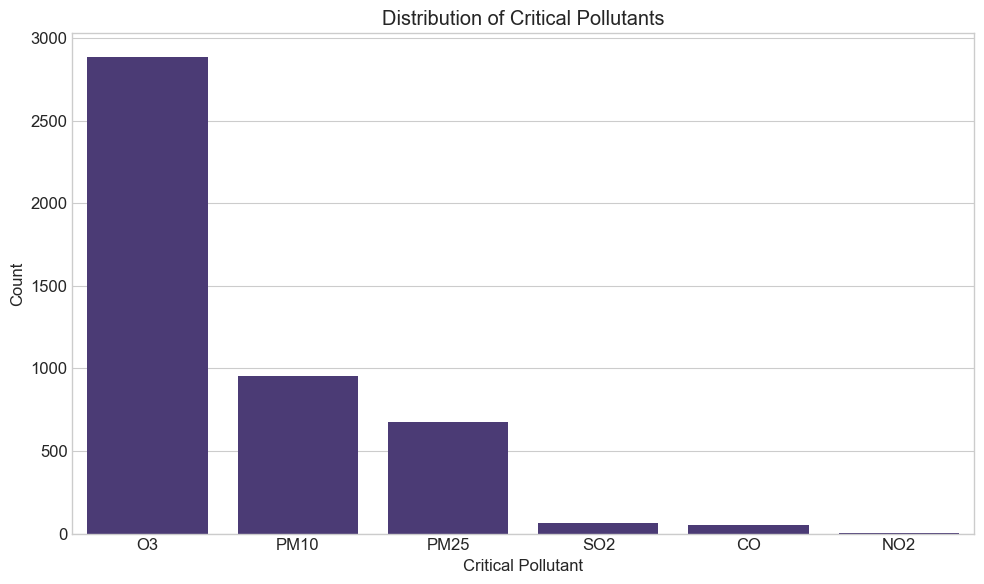

In [12]:
plt.figure(figsize=(10, 6))
critical_counts = df['critical'].value_counts()
sns.barplot(x=critical_counts.index, y=critical_counts.values)
plt.title('Distribution of Critical Pollutants')
plt.xlabel('Critical Pollutant')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

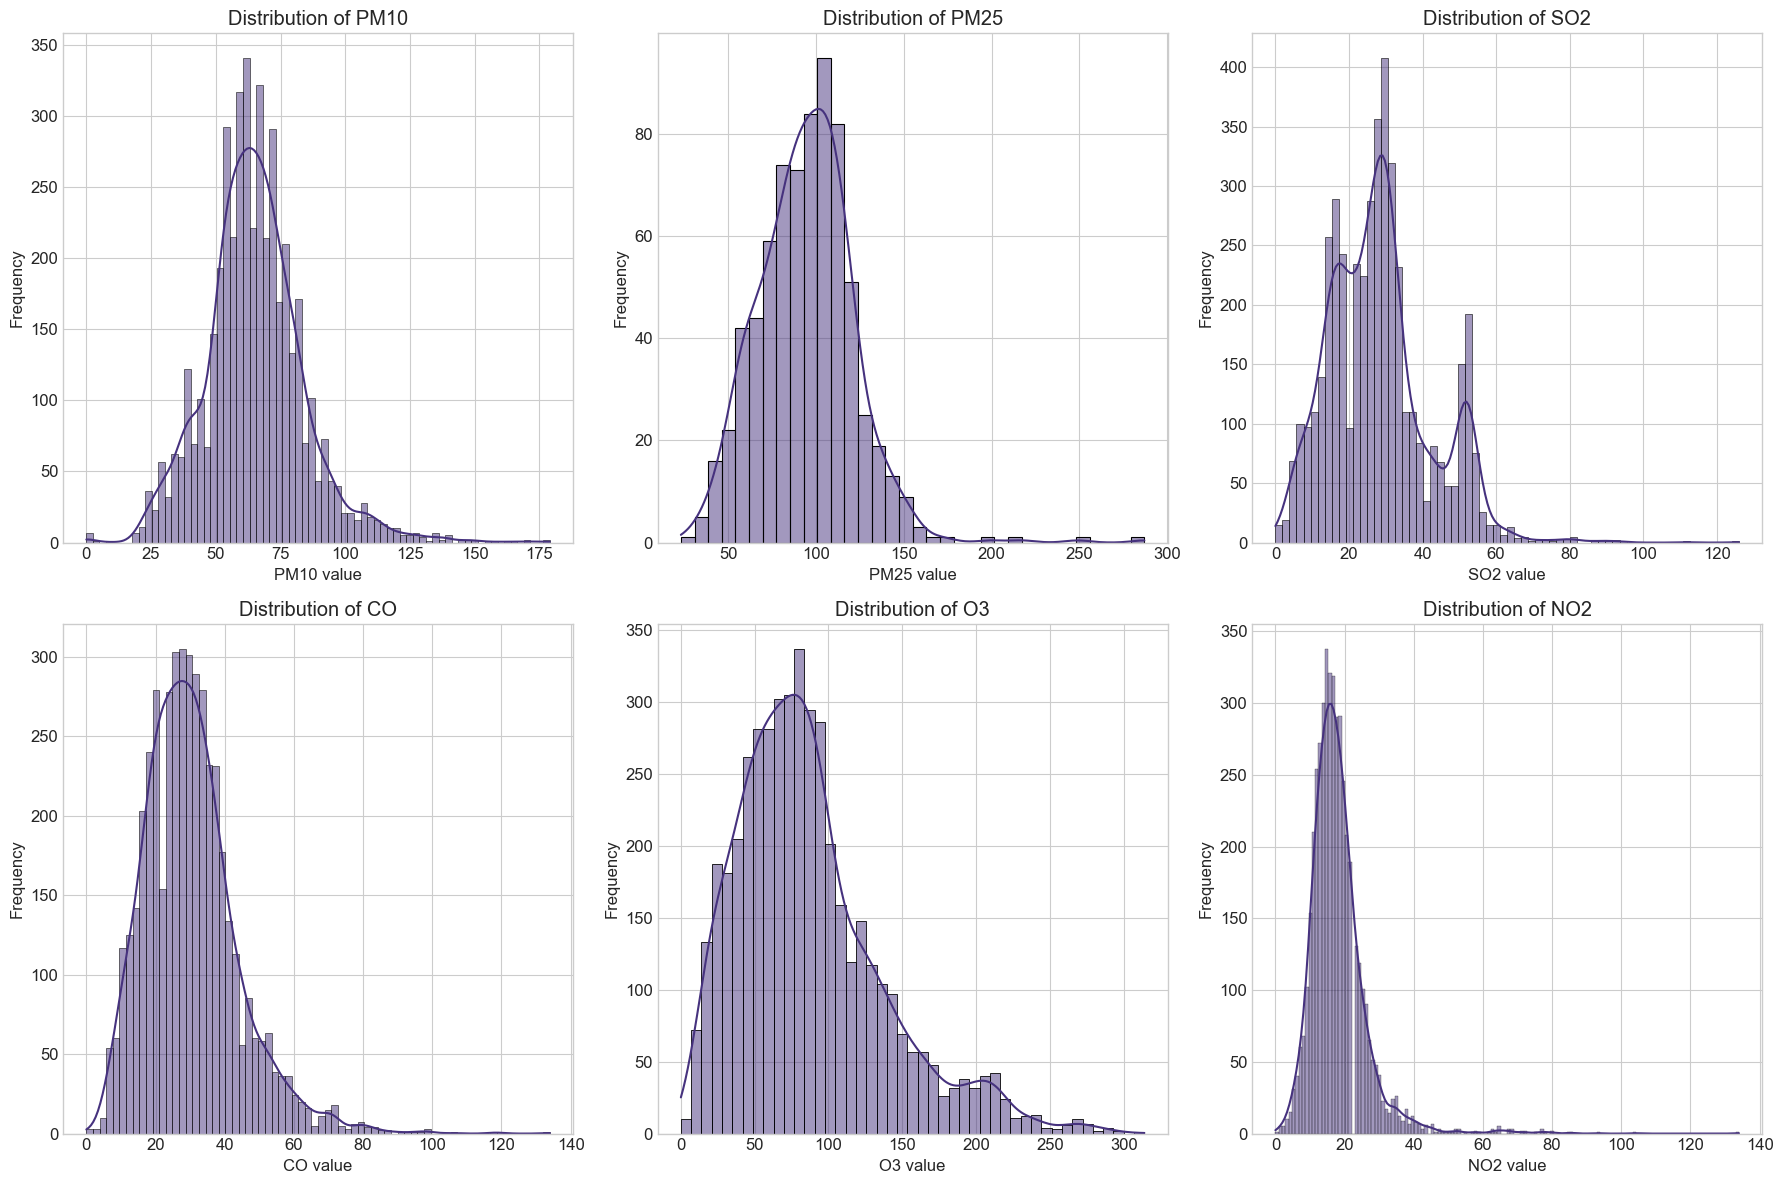

In [13]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, col in enumerate(pollutants):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col.upper()}')
    axes[i].set_xlabel(f'{col.upper()} value')
    axes[i].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

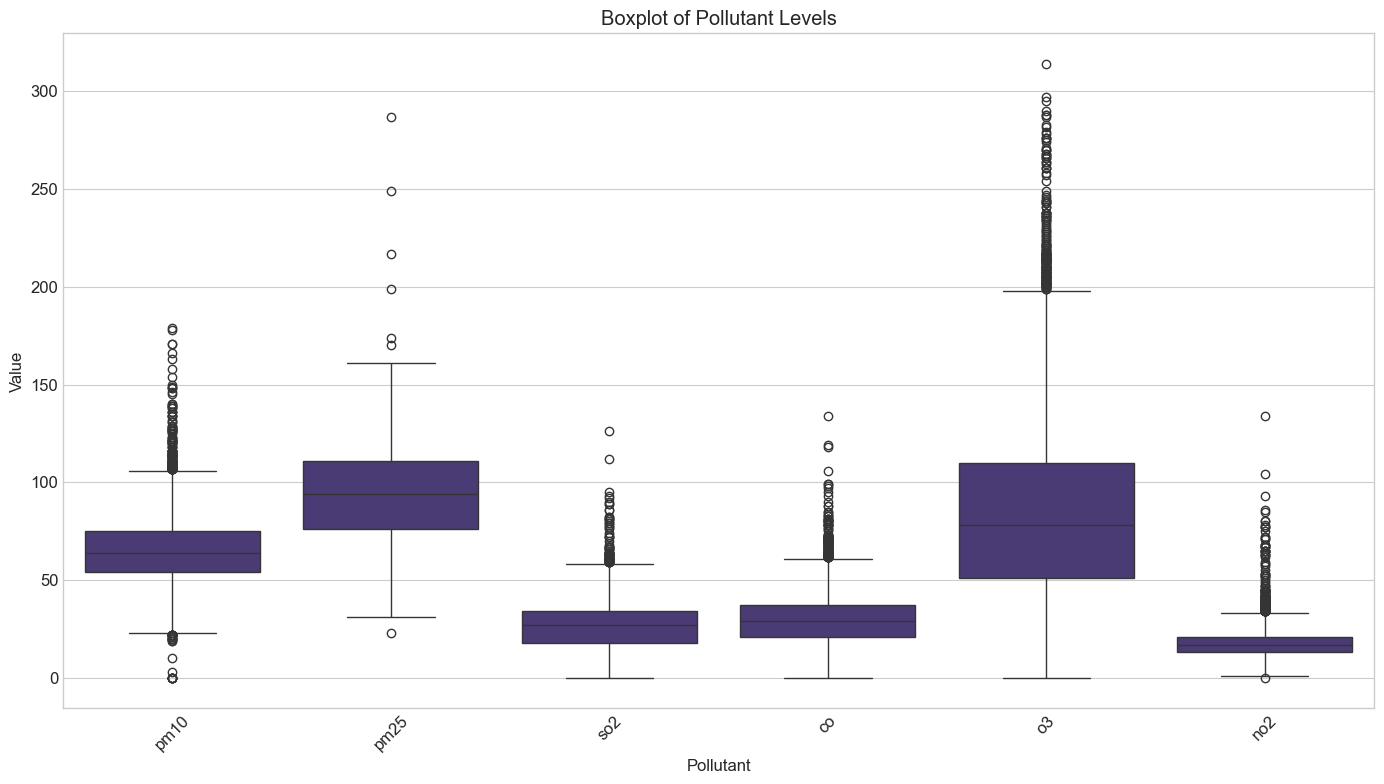

In [14]:
plt.figure(figsize=(14, 8))
melted_df = pd.melt(df[pollutants], var_name='Pollutant', value_name='Value')
sns.boxplot(x='Pollutant', y='Value', data=melted_df)
plt.title('Boxplot of Pollutant Levels')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

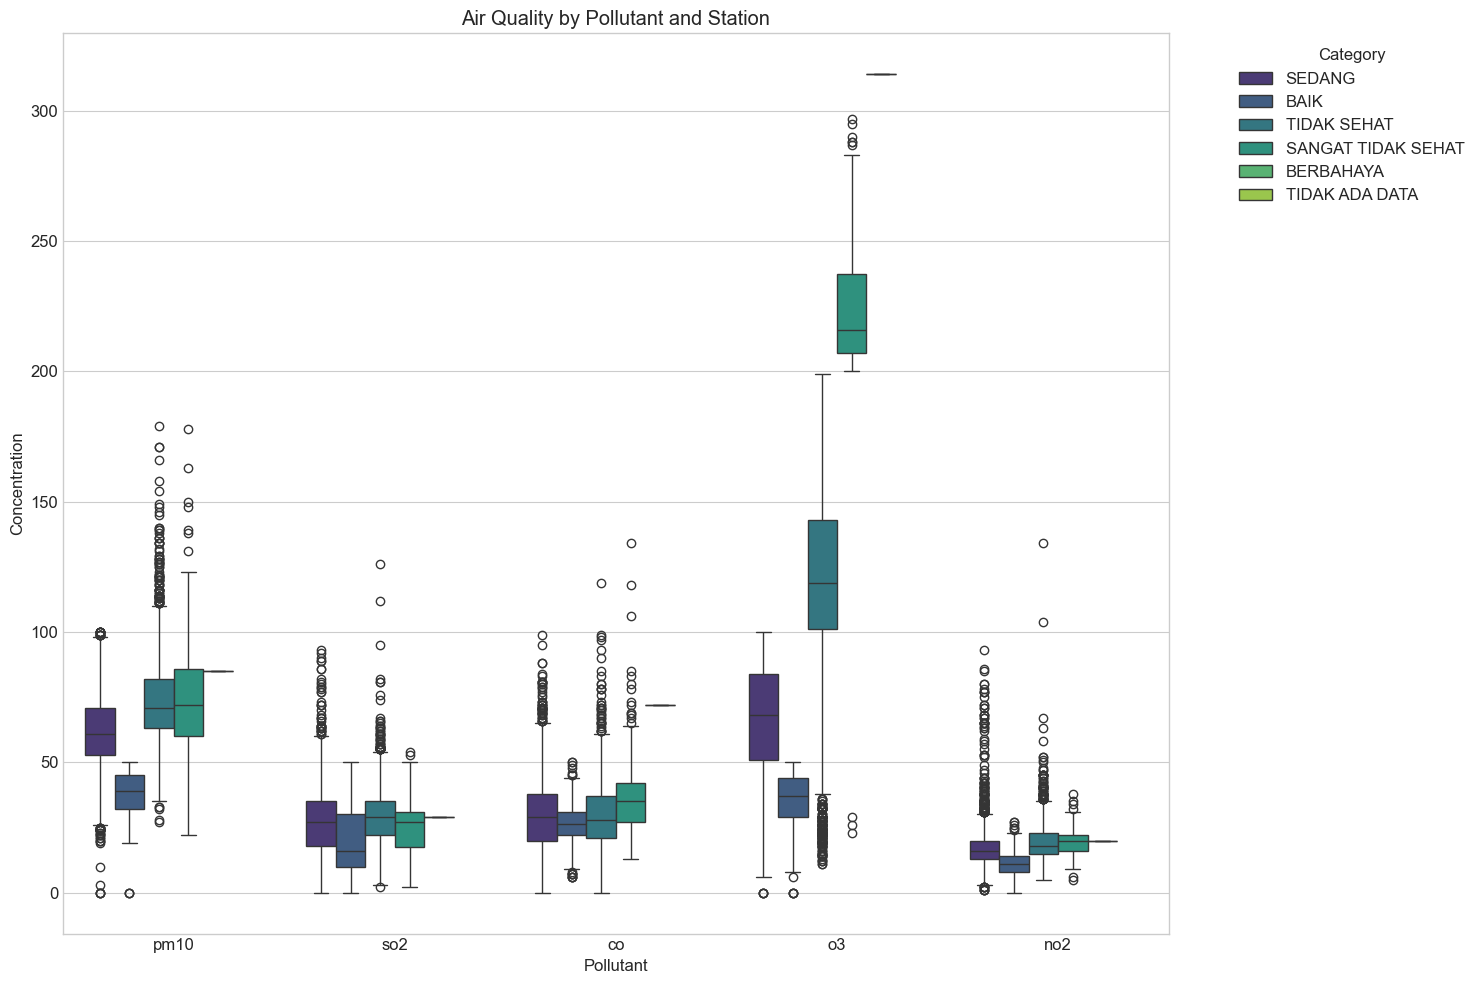

In [15]:
pollutants = ["pm10", "so2", "co", "o3", "no2"]
df_melted = df.melt(id_vars="categori", value_vars=pollutants, var_name="Pollutant", value_name="Concentration")

plt.figure(figsize=(15, 10))
sns.boxplot(data=df_melted, x="Pollutant", y="Concentration", hue="categori")
plt.yscale('linear') 
plt.xlabel("Pollutant")
plt.ylabel("Concentration")
plt.title("Air Quality by Pollutant and Station")
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

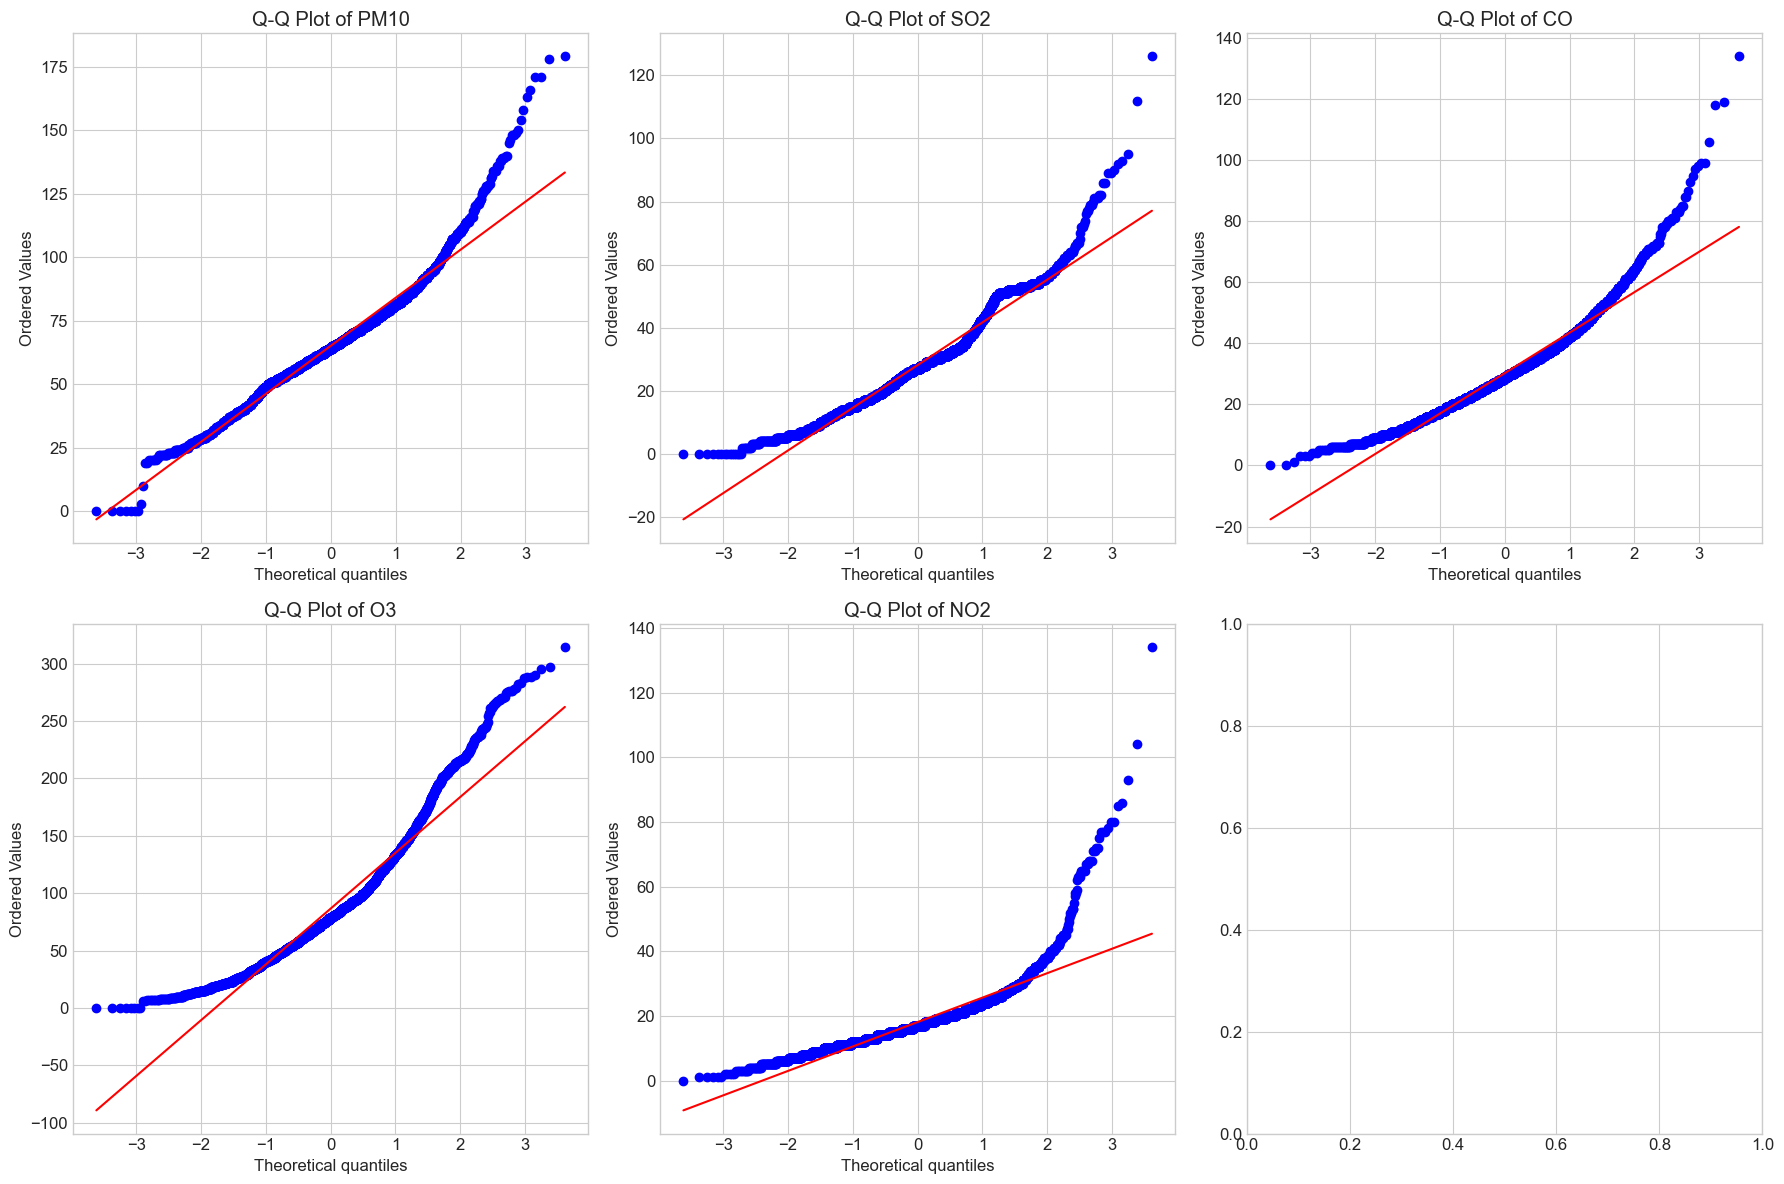

In [16]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, col in enumerate(pollutants):
    stats.probplot(df[col].dropna(), plot=axes[i])
    axes[i].set_title(f'Q-Q Plot of {col.upper()}')
    
plt.tight_layout()

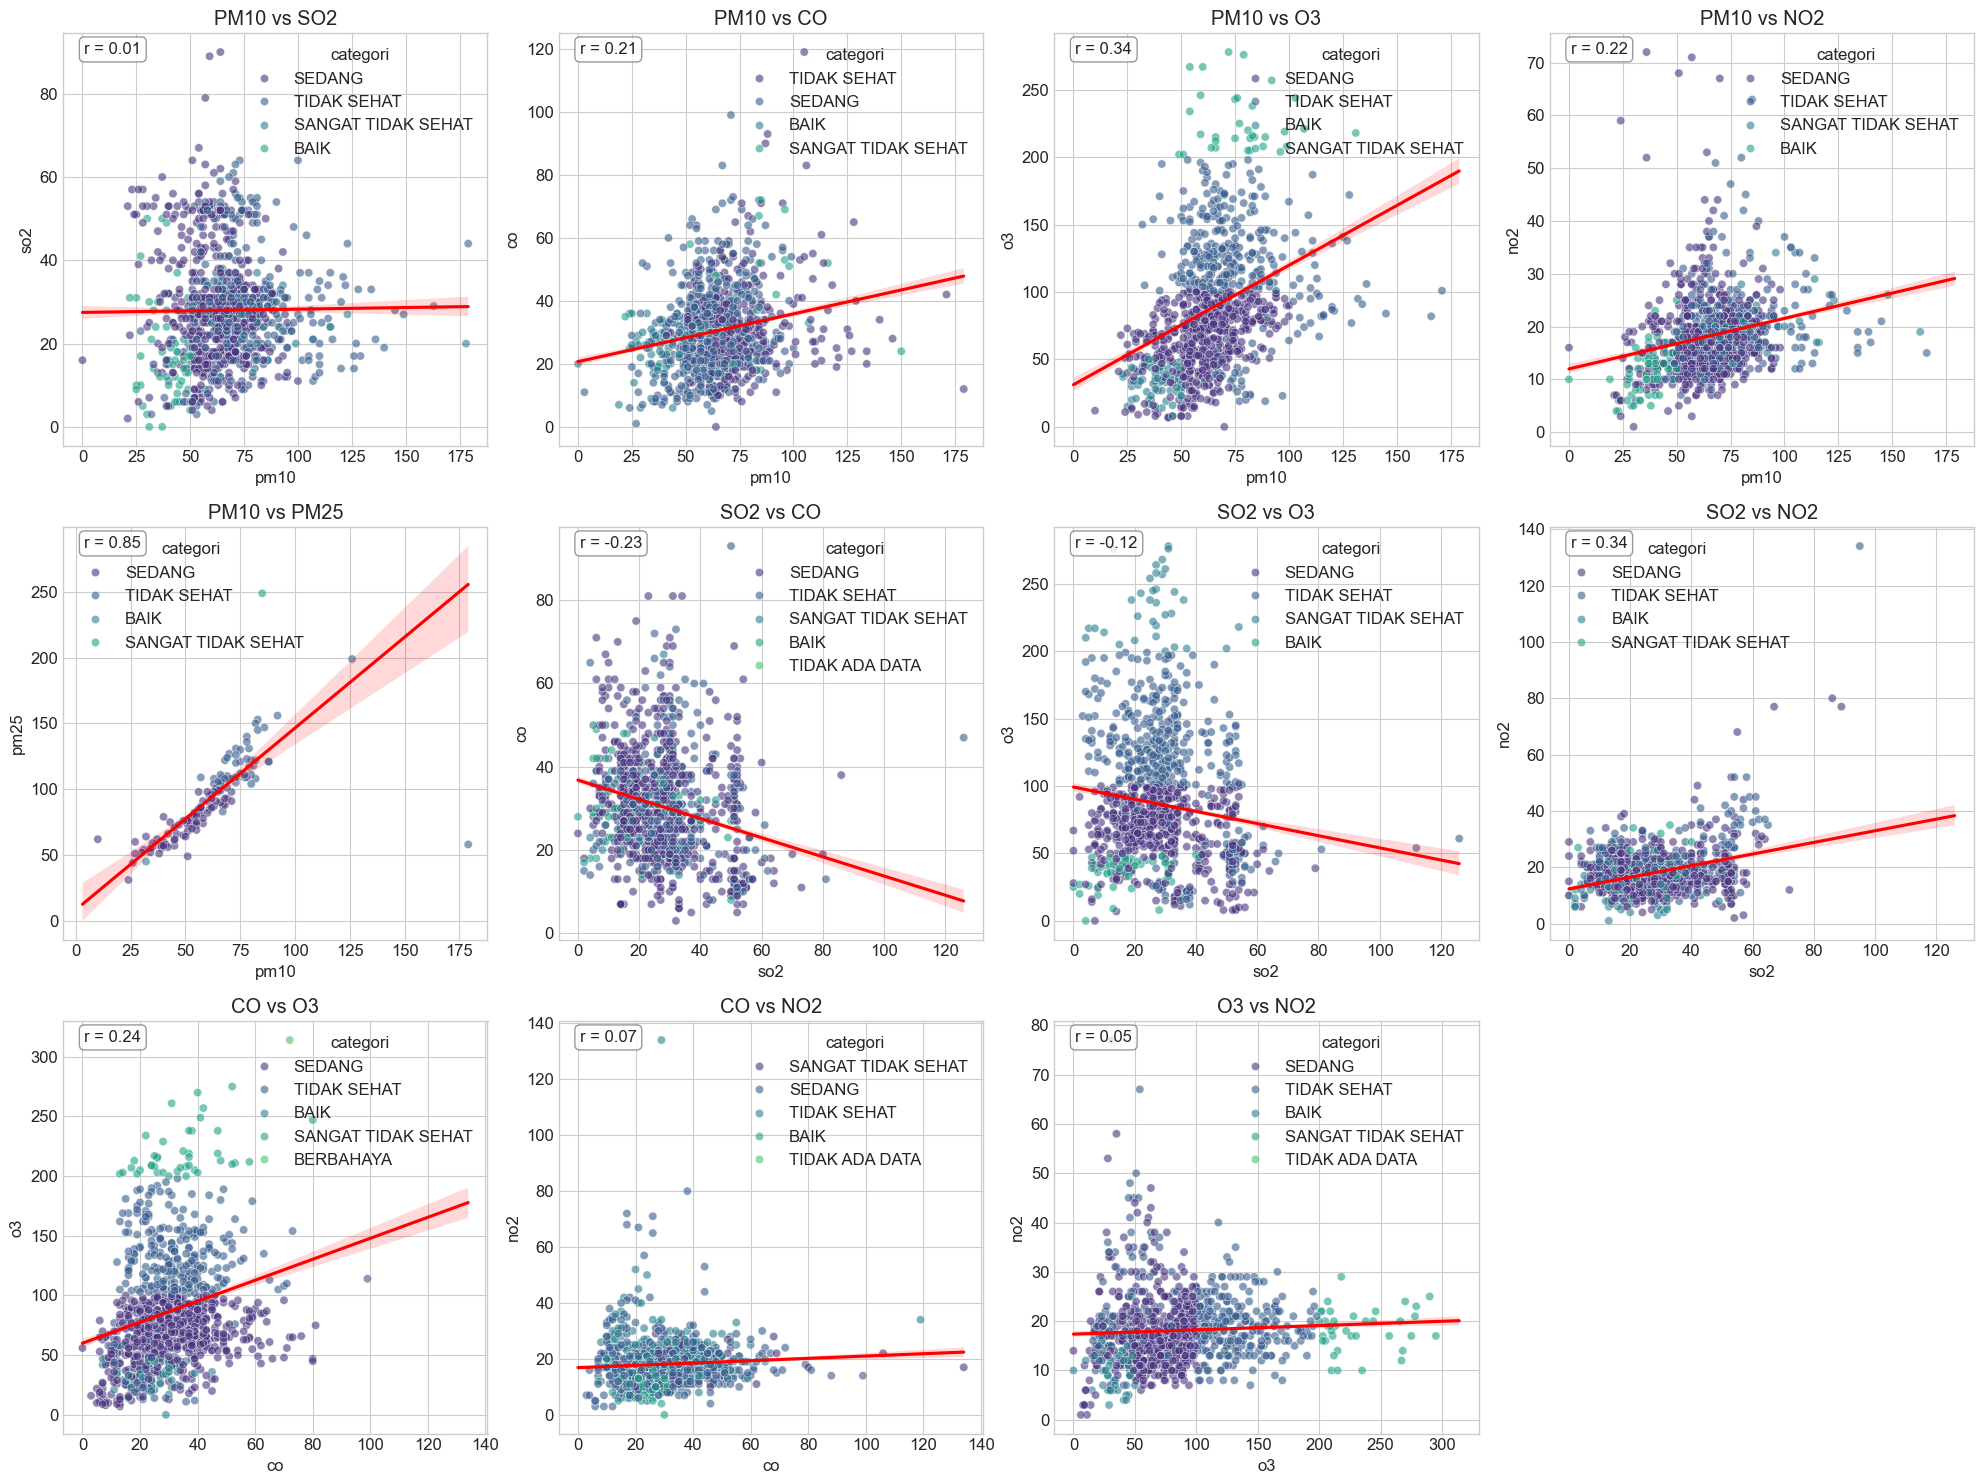

In [17]:
pollutant_pairs = [
        ('pm10', 'so2'), ('pm10', 'co'), ('pm10', 'o3'), ('pm10', 'no2'), ('pm10', 'pm25'),
        ('so2', 'co'), ('so2', 'o3'), ('so2', 'no2'),
        ('co', 'o3'), ('co', 'no2'),
        ('o3', 'no2')
    ]

fig, axes = plt.subplots(3, 4, figsize=(20, 15))
axes = axes.flatten()

for i, (x_var, y_var) in enumerate(pollutant_pairs):
    if i < len(axes):
        sns.scatterplot(
            x=x_var, 
            y=y_var, 
            data=df.sample(min(1000, len(df))), 
            hue='categori',
            alpha=0.6,
            ax=axes[i]
        )
        axes[i].set_title(f'{x_var.upper()} vs {y_var.upper()}')
        axes[i].set_xlabel(x_var.upper())
        axes[i].set_ylabel(y_var.upper())
        
        sns.regplot(
            x=x_var, 
            y=y_var, 
            data=df,
            scatter=False,
            ax=axes[i],
            line_kws={"color": "red"}
        )
        
        corr = df[[x_var, y_var]].corr().iloc[0, 1]
        axes[i].annotate(f'r = {corr:.2f}', 
                        xy=(0.05, 0.95), 
                        xycoords='axes fraction',
                        bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))
        
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()

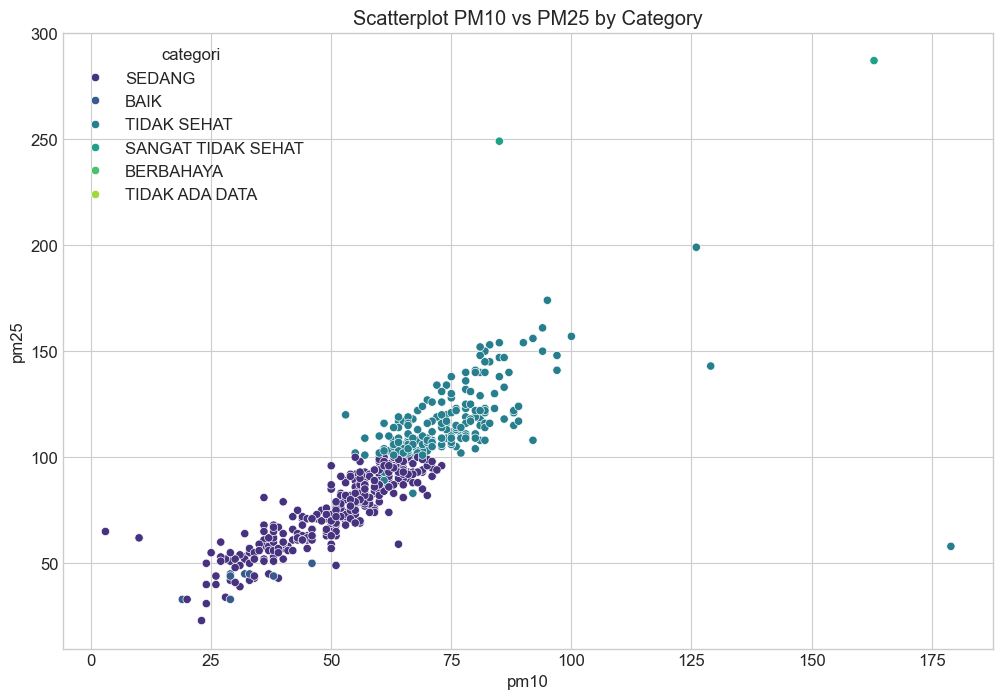

In [18]:
sns.scatterplot(data=df, x='pm10', y='pm25', hue='categori')
plt.title('Scatterplot PM10 vs PM25 by Category')
plt.show()

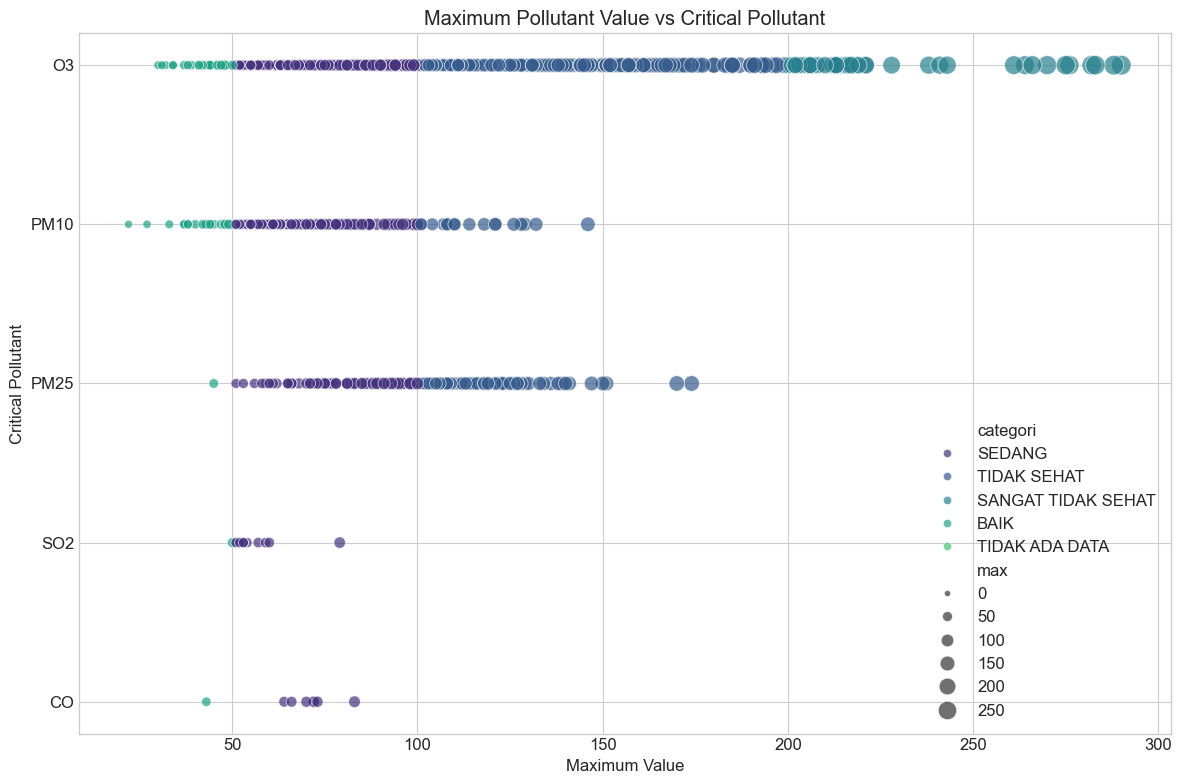

In [19]:
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='max', 
    y='critical', 
    data=df.sample(min(1000, len(df))),
    hue='categori',
    size='max',
    sizes=(20, 200),
    alpha=0.7
)
plt.title('Maximum Pollutant Value vs Critical Pollutant')
plt.xlabel('Maximum Value')
plt.ylabel('Critical Pollutant')
plt.tight_layout()

In [20]:
df.duplicated().sum()

0

In [21]:
missing_values = df.isnull().sum()
missing_percent = 100 * missing_values / len(df)
missing_df = pd.DataFrame({'Missing Values': missing_values, 
                            'Percentage': missing_percent})
missing_df

,Missing Values,Percentage
tanggal,0,0.000000
stasiun,0,0.000000
pm10,160,3.458712
pm25,3903,84.370947
so2,19,0.410722
co,8,0.172936
o3,5,0.108085
no2,8,0.172936
max,0,0.000000
critical,1,0.021617


In [22]:
for i in df.columns:
    if df[i].dtype != 'object':
        print(i)
        print("Skewness: ",df[i].skew())
        print("Kurtosis: ",df[i].kurtosis())
        print('--------------------------------')


pm10
Skewness:  0.6976283251875913
Kurtosis:  2.543138686566048
--------------------------------
pm25
Skewness:  0.8741804093854169
Kurtosis:  4.669665749386857
--------------------------------
so2
Skewness:  0.8060767113861756
Kurtosis:  1.3852250609833892
--------------------------------
co
Skewness:  1.1495489468612519
Kurtosis:  3.1162217254138214
--------------------------------
o3
Skewness:  1.0834534296825264
Kurtosis:  1.3355325598728496
--------------------------------
no2
Skewness:  3.09859507356851
Kurtosis:  21.378148794894177
--------------------------------
max
Skewness:  1.3581447940072038
Kurtosis:  2.280507575989275
--------------------------------


Data Processing

In [23]:
df['tanggal'] = pd.to_datetime(df['tanggal'])

df['year'] = df['tanggal'].dt.year
df['month'] = df['tanggal'].dt.month
df['day'] = df['tanggal'].dt.day
df['dayofweek'] = df['tanggal'].dt.dayofweek  
df['is_weekend'] = df['dayofweek'].apply(lambda x: 1 if x >= 5 else 0)

In [24]:
df.head(3)

,tanggal,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,categori,year,month,day,dayofweek,is_weekend
0,2010-01-01,DKI1 (Bunderan HI),60.0,NaN,4.0,73.0,27.0,14.0,73.0,CO,SEDANG,2010,1,1,4,0
1,2010-01-02,DKI1 (Bunderan HI),32.0,NaN,2.0,16.0,33.0,9.0,33.0,O3,BAIK,2010,1,2,5,1
2,2010-01-03,DKI1 (Bunderan HI),27.0,NaN,2.0,19.0,20.0,9.0,27.0,PM10,BAIK,2010,1,3,6,1


In [25]:
df.drop(columns=['tanggal', 'stasiun', 'pm25'], inplace=True)

In [26]:
df.head(3)

,pm10,so2,co,o3,no2,max,critical,categori,year,month,day,dayofweek,is_weekend
0,60.0,4.0,73.0,27.0,14.0,73.0,CO,SEDANG,2010,1,1,4,0
1,32.0,2.0,16.0,33.0,9.0,33.0,O3,BAIK,2010,1,2,5,1
2,27.0,2.0,19.0,20.0,9.0,27.0,PM10,BAIK,2010,1,3,6,1


In [27]:
df = df.fillna(df.median(numeric_only=True))

In [28]:
for column in df.columns:
    mode = df[column].mode()
    if not mode.empty:
        df[column] = df[column].fillna(mode[0])

In [29]:
missing_values = df.isnull().sum()
missing_percent = 100 * missing_values / len(df)
missing_df = pd.DataFrame({'Missing Values': missing_values, 
                            'Percentage': missing_percent})
missing_df

,Missing Values,Percentage
pm10,0,0.0
so2,0,0.0
co,0,0.0
o3,0,0.0
no2,0,0.0
max,0,0.0
critical,0,0.0
categori,0,0.0
year,0,0.0
month,0,0.0


In [30]:
df = df[df['categori'] != 'BERBAHAYA']
df = df[df['categori'] != 'TIDAK ADA DATA']


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4624 entries, 0 to 4625
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pm10        4624 non-null   float64
 1   so2         4624 non-null   float64
 2   co          4624 non-null   float64
 3   o3          4624 non-null   float64
 4   no2         4624 non-null   float64
 5   max         4624 non-null   float64
 6   critical    4624 non-null   object 
 7   categori    4624 non-null   object 
 8   year        4624 non-null   int32  
 9   month       4624 non-null   int32  
 10  day         4624 non-null   int32  
 11  dayofweek   4624 non-null   int32  
 12  is_weekend  4624 non-null   int64  
dtypes: float64(6), int32(4), int64(1), object(2)
memory usage: 433.5+ KB


In [32]:
df = pd.get_dummies(df, columns=['critical'])

In [33]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['categori'] = label_encoder.fit_transform(df['categori'])

In [34]:
df.head(3)

,pm10,so2,co,o3,no2,max,categori,year,month,day,dayofweek,is_weekend,critical_CO,critical_NO2,critical_O3,critical_PM10,critical_PM25,critical_SO2
0,60.0,4.0,73.0,27.0,14.0,73.0,2,2010,1,1,4,0,True,False,False,False,False,False
1,32.0,2.0,16.0,33.0,9.0,33.0,0,2010,1,2,5,1,False,False,True,False,False,False
2,27.0,2.0,19.0,20.0,9.0,27.0,0,2010,1,3,6,1,False,False,False,True,False,False


In [35]:
df['month_sin'] = np.sin(2 * np.pi * df['month']/12)
df['month_cos'] = np.cos(2 * np.pi * df['month']/12)
df['dayofweek_sin'] = np.sin(2 * np.pi * df['dayofweek']/7)
df['dayofweek_cos'] = np.cos(2 * np.pi * df['dayofweek']/7)

In [38]:
X = df[['year', 'month', 'day', 'month_sin', 'month_cos', 
        'dayofweek_sin', 'dayofweek_cos', 'is_weekend']]
y = df['categori']

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

C:\Users\Asus TUF\AppData\Roaming\Python\Python312\site-packages\dask\dataframe\__init__.py:49: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [312]:
from sklearn.model_selection import train_test_split


In [314]:
X = df[['pm10', 'so2', 'co', 'o3', 'no2', 'max', 'critical_PM10', 'critical_SO2', 'critical_CO', 'critical_O3', 'critical_NO2']]
y = df['categori'] 

In [315]:
def split_data(X, y, train_size=0.7, val_size=0.15, test_size=0.15, random_state=42):
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, train_size=train_size, random_state=random_state, stratify=y)
    relative_val_size = val_size / (val_size + test_size)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, train_size=relative_val_size, random_state=random_state, stratify=y_temp)
    return X_train, X_val, X_test, y_train, y_val, y_test

X_train, X_val, X_test, y_train, y_val, y_test = split_data(X, y)

In [316]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

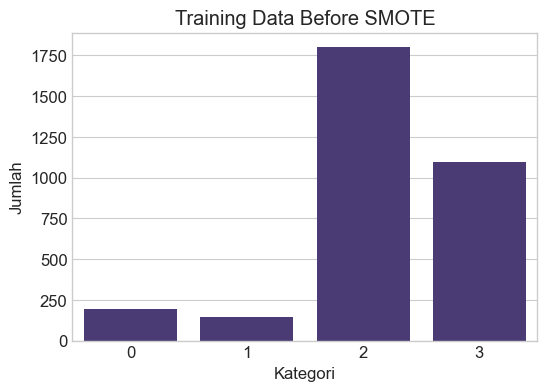

In [317]:
plt.figure(figsize=(6,4))
sns.countplot(x=y_train)
plt.title('Training Data Before SMOTE')
plt.xlabel('Kategori')
plt.ylabel('Jumlah')
plt.show()

In [318]:
from imblearn.over_sampling import SMOTE

In [319]:
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

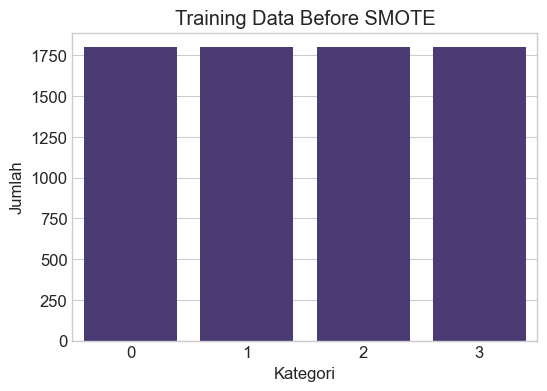

In [320]:
plt.figure(figsize=(6,4))
sns.countplot(x=y_train)
plt.title('Training Data Before SMOTE')
plt.xlabel('Kategori')
plt.ylabel('Jumlah')
plt.show()

In [321]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV


In [325]:
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'KNN': KNeighborsClassifier(),
}



In [326]:
val_scores = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    
    y_val_pred = model.predict(X_val)
    
    acc = accuracy_score(y_val, y_val_pred)
    val_scores[name] = acc
    
    print(f"Validation Accuracy ({name}): {acc:.4f}")
    print(classification_report(y_val, y_val_pred))



Training Random Forest...
Validation Accuracy (Random Forest): 0.9986
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       1.00      0.97      0.98        30
           2       1.00      1.00      1.00       387
           3       1.00      1.00      1.00       235

    accuracy                           1.00       694
   macro avg       1.00      0.99      1.00       694
weighted avg       1.00      1.00      1.00       694


Training Logistic Regression...
Validation Accuracy (Logistic Regression): 0.9438
              precision    recall  f1-score   support

           0       0.65      0.98      0.78        42
           1       0.83      0.97      0.89        30
           2       0.99      0.93      0.96       387
           3       0.97      0.96      0.97       235

    accuracy                           0.94       694
   macro avg       0.86      0.96      0.90       694
weighted avg       0.96      0.

Model 1

In [328]:
param_grid_rf = {
    'n_estimators': [100, 150,200,300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5,8, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(random_state=42)
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, n_jobs=-1, verbose=1)
grid_rf.fit(X_train, y_train)

print(f"🔥 Best Random Forest params: {grid_rf.best_params_}")



Fitting 5 folds for each of 192 candidates, totalling 960 fits
🔥 Best Random Forest params: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [329]:
models = {
    'Random Forest Tuned': grid_rf.best_estimator_,
}

val_scores = {}

for name, model in models.items():
    print(f"\nEvaluating {name}...")
    y_val_pred = model.predict(X_val)
    
    acc = accuracy_score(y_val, y_val_pred)
    val_scores[name] = acc
    
    print(f"Validation Accuracy ({name}): {acc:.4f}")
    print(classification_report(y_val, y_val_pred))


Evaluating Random Forest Tuned...
Validation Accuracy (Random Forest Tuned): 0.9986
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       1.00      0.97      0.98        30
           2       1.00      1.00      1.00       387
           3       1.00      1.00      1.00       235

    accuracy                           1.00       694
   macro avg       1.00      0.99      1.00       694
weighted avg       1.00      1.00      1.00       694

